<a href="https://colab.research.google.com/github/adem-maatallah/adem-maatallah/blob/main/ds_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Project Title: Predicting Data Scientist Salaries with Linear Regression and Gradient Boosting Regressor**

In this project, we aim to analyze and **predict** **data scientist salaries** based on various features that may influence compensation. Data scientists are in high demand, and understanding the factors affecting their salaries can provide valuable insights for both job seekers and employers. We'll use linear regression and Gradient Boosting Regressor to build predictive models for data scientist salaries.

#Data Collection and Exploration

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df=pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [102]:
for i in df.columns:
  print(i, '==>', df[i].unique(), '\n')

Unnamed: 0 ==> [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242

In [103]:
#categorical data
cat_cols=[i for i in df.columns if df[i].dtype=='object']
cat_df=df[cat_cols]
#numeric data
num_cols=[i for i in df.columns if df[i].dtype!='object']
num_df=df[num_cols]

#EDA

## categorizing 'job_title'

In [104]:
data_science_keywords='head of data|data science engineer|head of data scienceapplied data scientist|business data analyst|data science consultant|data science manager|data scientist|director of data science|lead data analyst|lead data scientist|principal data analyst|principal data scientist|product data analyst|research scientist|staff data scientist'
data_analyst_keywords='analytics engineer|bi data analyst|data analytics engineer|data analytics lead|data analytics manager|data analyst|data specialist|finance data analyst|financial data analyst|marketing data analyst'
data_engineer_keywords='data architect|big data architect|big data engineer|cloud data engineer|data engineer|data engineering manager|director of data engineering|etl developer|lead data engineer|principal data engineer'
machine_learning_engineer_keywords='machine learning developer|ai scientist|applied machine learning scientist|head of machine learning|lead machine learning engineer|machine learning engineer|machine learning infrastructure engineer|machine learning manager|ml engineer|machine learning scientist'
computer_vision_keywords_keywords='3d computer vision researcher|computer vision engineer|computer vision software engineer'
nlp_engineer_keywords='nlp engineer'
conditions=[(df['job_title'].str.lower().str.contains(data_science_keywords)),
            (df['job_title'].str.lower().str.contains(data_analyst_keywords)),
            (df['job_title'].str.lower().str.contains(data_engineer_keywords)),
            (df['job_title'].str.lower().str.contains(machine_learning_engineer_keywords)),
            (df['job_title'].str.lower().str.contains(computer_vision_keywords_keywords)),
            (df['job_title'].str.lower().str.contains(nlp_engineer_keywords))
            ]
job_categories=['Data Scientist', 'Data Analyst', 'Data Engineer', 'ML Engineer', 'Computer Vision','NLP Engineer']
df['job_category']=np.select(conditions, job_categories, default='Other')

In [105]:
df['job_category'].value_counts()

Data Scientist     225
Data Engineer      172
Data Analyst       124
ML Engineer         75
Computer Vision     10
NLP Engineer         1
Name: job_category, dtype: int64

In [106]:
job_cat_vs_salary=df.groupby('job_category', as_index=False).agg({"salary_in_usd": 'mean'}).sort_values('salary_in_usd', ascending=False)

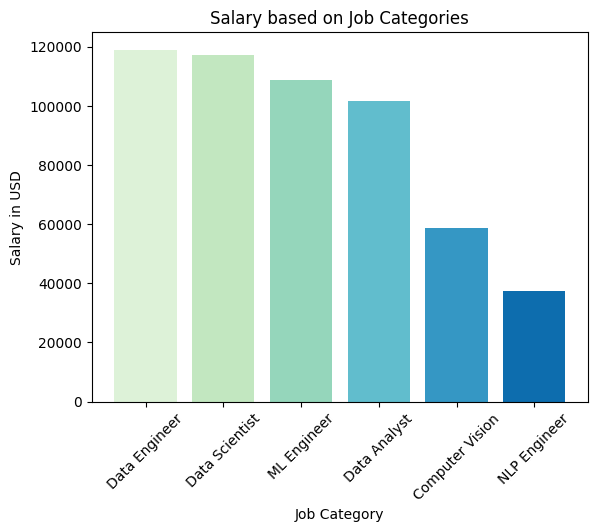

In [107]:
plt.bar(job_cat_vs_salary['job_category'], job_cat_vs_salary['salary_in_usd'], color=sns.color_palette('GnBu', len(job_cat_vs_salary['job_category'])))
plt.xticks(rotation=45)
plt.ylabel('Salary in USD')
plt.xlabel('Job Category')
plt.title('Salary based on Job Categories')
plt.show()

In [108]:
job_cat_map={
    'Data Engineer':0,
    'Data Scientist':1,
    'ML Engineer':2,
    'Data Analyst':3,
    'Computer Vision':4,
    'NLP Engineer':5
}

In [109]:
df['job_cat_encoded']=df['job_category'].map(job_cat_map)

In [110]:
df[['salary_in_usd', 'job_cat_encoded']].corr()

,salary_in_usd,job_cat_encoded
salary_in_usd,1.000000,-0.122429
job_cat_encoded,-0.122429,1.000000


In [111]:
df.loc[df['job_category']=='Other', 'job_title'].unique()

array([], dtype=object)

##Salary Currency

In [112]:
currency_values = {
    'EUR': 1.13,
    'USD': 1.0,
    'GBP': 1.38,
    'HUF': 0.0036,
    'INR': 0.014,
    'JPY': 0.0091,
    'CNY': 0.15,
    'MXN': 0.05,
    'CAD': 0.81,
    'DKK': 0.16,
    'PLN': 0.27,
    'SGD': 0.74,
    'CLP': 0.0014,
    'BRL': 0.19,
    'TRY': 0.12,
    'AUD': 0.73,
    'CHF': 1.09
}
df['currency_to_usd']=df['salary_currency'].map(currency_values)
df['currency_to_usd'].head()

0    1.13
1    1.00
2    1.38
3    1.00
4    1.00
Name: currency_to_usd, dtype: float64

In [113]:
df.groupby('salary_currency').agg({"salary": 'count', 'salary_in_usd': 'mean'})

,salary,salary_in_usd
salary_currency,,
AUD,2,87064.000000
BRL,2,15904.000000
CAD,18,97222.888889
CHF,1,122346.000000
CLP,1,40038.000000
CNY,2,40283.500000
DKK,2,37252.500000
EUR,95,65751.473684
GBP,44,81670.977273


Text(0.5, 1.0, 'number of jobs per currency')

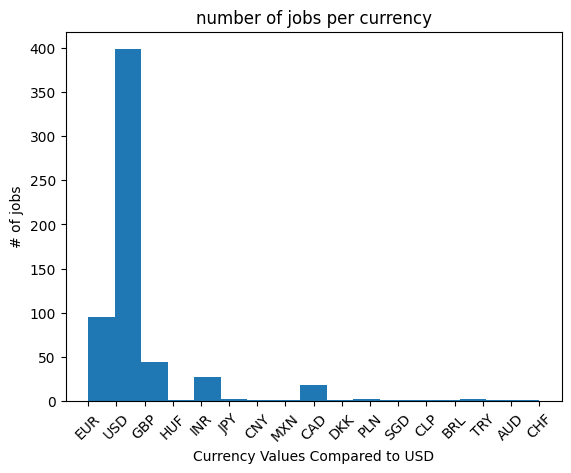

In [114]:
plt.hist(df['salary_currency'], bins=17)
plt.xticks(rotation=45)
plt.xlabel('Currency Values Compared to USD')
plt.ylabel('# of jobs')
plt.title('number of jobs per currency')

<Axes: xlabel='salary_currency', ylabel='salary_in_usd'>

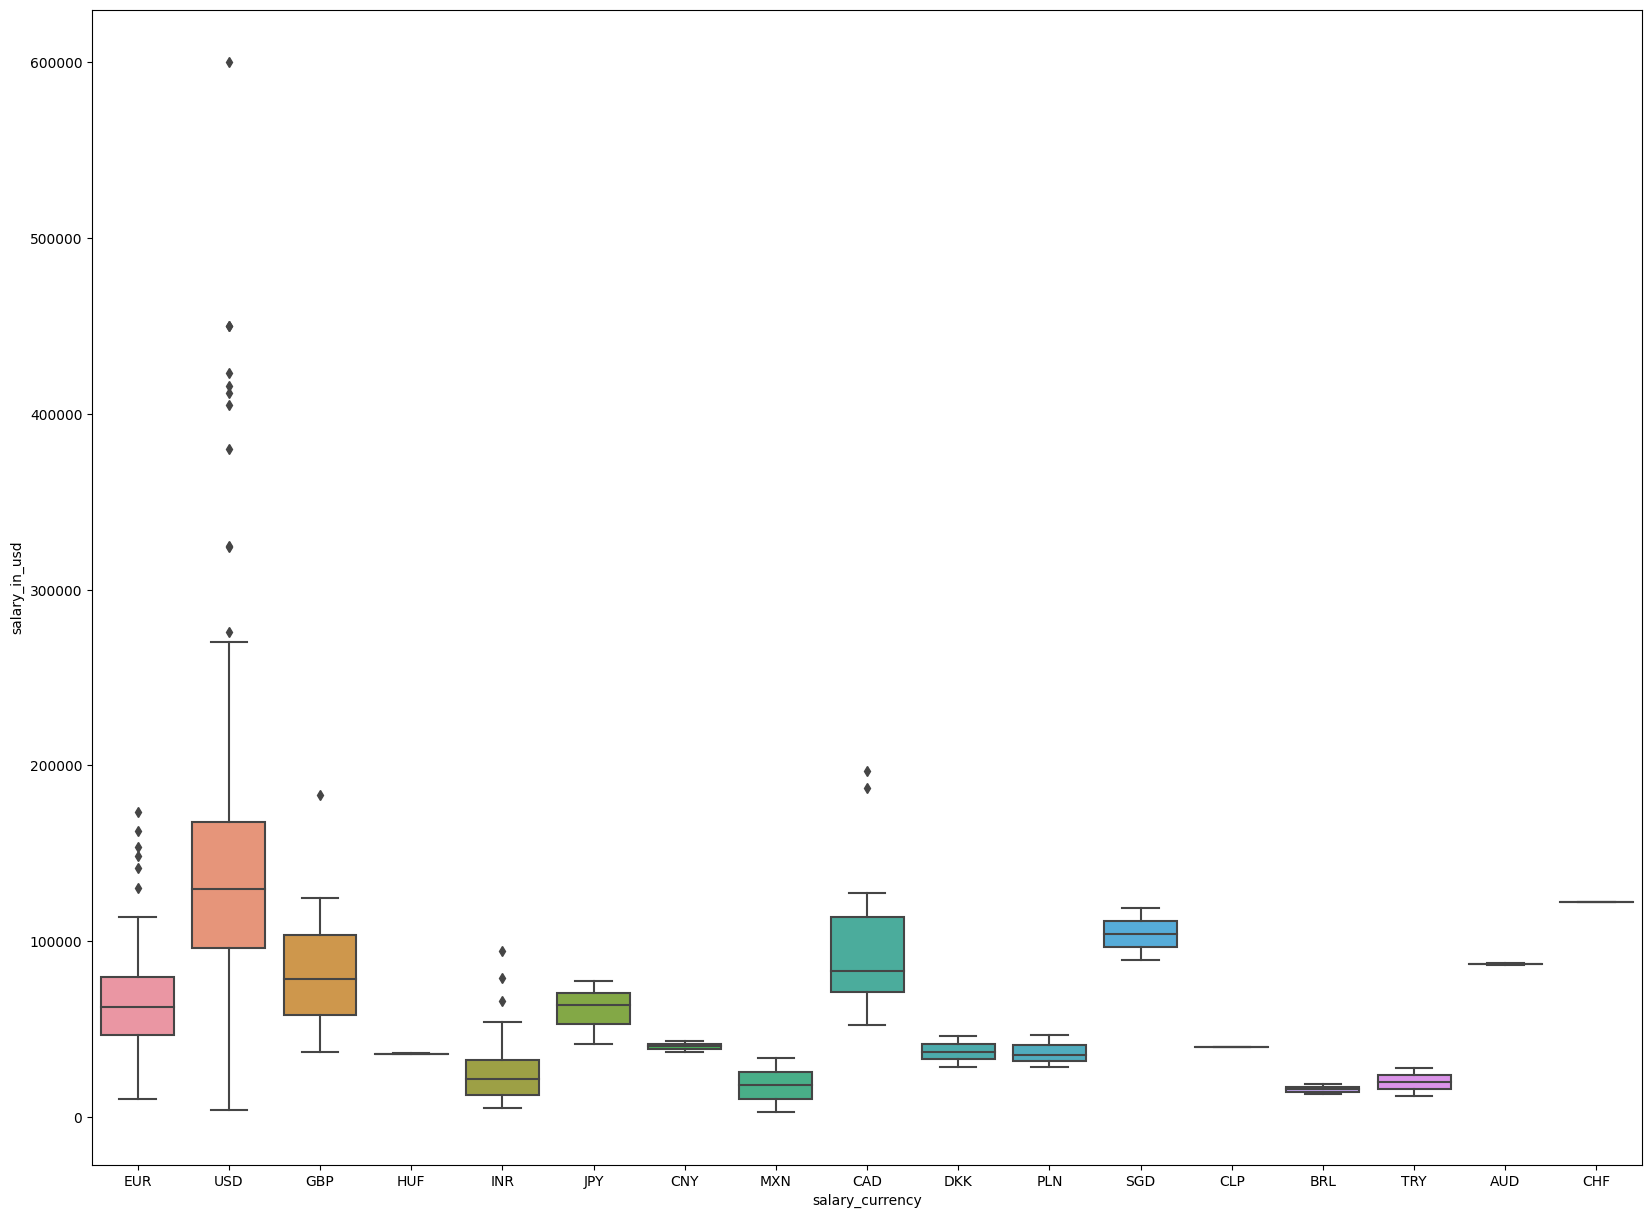

In [115]:
fig=plt.figure(figsize=(20,15))
sns.boxplot(data=df, x='salary_currency', y='salary_in_usd')

In [116]:
df[['currency_to_usd', 'salary_in_usd']].corr()

,currency_to_usd,salary_in_usd
currency_to_usd,1.000000,0.210022
salary_in_usd,0.210022,1.000000


In [117]:
df['currency_to_usd_log']=np.log((df['currency_to_usd']))

In [118]:
df[['currency_to_usd_log', 'salary_in_usd']].corr()

,currency_to_usd_log,salary_in_usd
currency_to_usd_log,1.000000,0.288295
salary_in_usd,0.288295,1.000000


In [119]:
currency_count_dict=df['salary_currency'].value_counts().to_dict()
currency_count_dict

{'USD': 398,
 'EUR': 95,
 'GBP': 44,
 'INR': 27,
 'CAD': 18,
 'JPY': 3,
 'PLN': 3,
 'TRY': 3,
 'CNY': 2,
 'MXN': 2,
 'HUF': 2,
 'DKK': 2,
 'SGD': 2,
 'BRL': 2,
 'AUD': 2,
 'CLP': 1,
 'CHF': 1}

In [120]:
for key, value in currency_count_dict.items():
    currency_count_dict[key] = np.log(value)
df['count_currency_log']=df['salary_currency'].map(currency_count_dict)

In [121]:
df[['count_currency_log', 'salary_in_usd']].corr()

,count_currency_log,salary_in_usd
count_currency_log,1.000000,0.433113
salary_in_usd,0.433113,1.000000


## 'work_year'

In [122]:
grouped_df=df.groupby('work_year').agg({"salary_in_usd":'mean'})

In [123]:
grouped_df

,salary_in_usd
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


In [124]:
df[['work_year', 'salary_in_usd']].corr()

,work_year,salary_in_usd
work_year,1.000000,0.170493
salary_in_usd,0.170493,1.000000


In [125]:
year_map={
    2020:0,
    2021:1,
    2022:2
}
df['year_encoded']=df['work_year'].map(year_map)

In [126]:
df[['year_encoded', 'salary_in_usd']].corr()

,year_encoded,salary_in_usd
year_encoded,1.000000,0.170493
salary_in_usd,0.170493,1.000000


##'experience_level'

<Axes: xlabel='experience_level'>

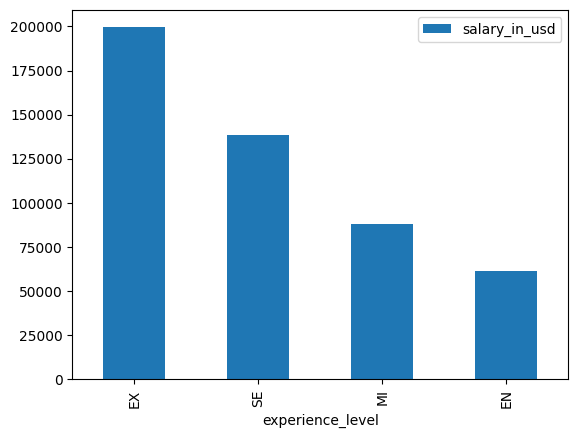

In [127]:
df.groupby('experience_level').agg({"salary_in_usd":'mean'}).sort_values('salary_in_usd', ascending=False).plot(kind='bar')

In [128]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [129]:
exp_lvl_dictmap={
    'EN':1,
    'MI':2,
    'SE':3,
    'EX':4
}
df['experience_level']=df['experience_level'].map(exp_lvl_dictmap)

In [130]:
df[['experience_level', 'salary_in_usd']].corr()

,experience_level,salary_in_usd
experience_level,1.000000,0.484233
salary_in_usd,0.484233,1.000000


##'employment_type'

In [131]:
df.groupby('employment_type').agg({"salary_in_usd":'mean'}).sort_values('salary_in_usd')

,salary_in_usd
employment_type,
PT,33070.500000
FL,48000.000000
FT,113468.073129
CT,184575.000000


<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

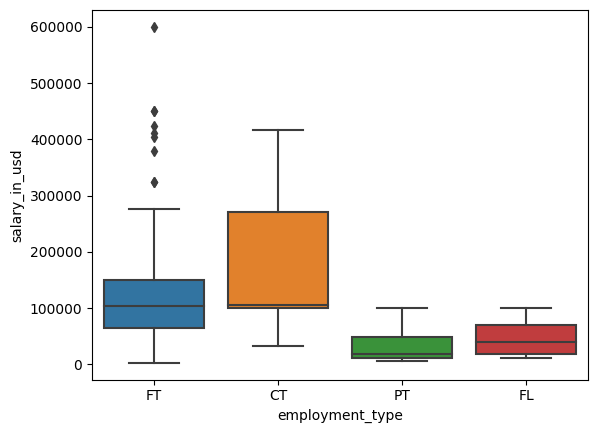

In [132]:
sns.boxplot(data=df, x="employment_type", y='salary_in_usd')

In [133]:
employment_type_dictmap={
    'PT': 1,
    'FL': 2,
    'FT': 3,
    'CT': 4
    }
df['employment_type'] = df['employment_type'].map(employment_type_dictmap)

In [134]:
df[['employment_type', 'salary_in_usd']].corr()

,employment_type,salary_in_usd
employment_type,1.000000,0.181284
salary_in_usd,0.181284,1.000000


##'employee_residence'

In [135]:
employee_residence_df=df.groupby('employee_residence').agg({'salary_in_usd': 'mean'}).sort_values('salary_in_usd', ascending=True)

In [136]:
mapping_employee_residence = {}  # Create an empty dictionary to store the mapping

for i, index_value in enumerate(employee_residence_df.index):
    mapping_employee_residence[index_value] = i

In [137]:
print(mapping_employee_residence)

{'IR': 0, 'KE': 1, 'UA': 2, 'MD': 3, 'MX': 4, 'HN': 5, 'TR': 6, 'CO': 7, 'RS': 8, 'PK': 9, 'MT': 10, 'NG': 11, 'VN': 12, 'TN': 13, 'EE': 14, 'HU': 15, 'DK': 16, 'IN': 17, 'CL': 18, 'PT': 19, 'CN': 20, 'HR': 21, 'PH': 22, 'RO': 23, 'BR': 24, 'PL': 25, 'GR': 26, 'ES': 27, 'LU': 28, 'FR': 29, 'AR': 30, 'NL': 31, 'IT': 32, 'SI': 33, 'HK': 34, 'CZ': 35, 'IE': 36, 'BO': 37, 'AT': 38, 'BG': 39, 'GB': 40, 'DE': 41, 'BE': 42, 'CA': 43, 'AE': 44, 'JE': 45, 'DZ': 46, 'IQ': 47, 'JP': 48, 'SG': 49, 'RU': 50, 'AU': 51, 'CH': 52, 'NZ': 53, 'US': 54, 'PR': 55, 'MY': 56}


In [138]:
df['employee_residence_encoded']=df['employee_residence'].map(mapping_employee_residence)

In [139]:
df[['employee_residence_encoded', 'salary_in_usd']].corr()

,employee_residence_encoded,salary_in_usd
employee_residence_encoded,1.000000,0.606139
salary_in_usd,0.606139,1.000000


##'company_location'

In [140]:
company_location_df=df.groupby('company_location').agg({'salary_in_usd': 'mean'}).sort_values('salary_in_usd', ascending=True)

In [141]:
mapping_company_location={}
for i, index_value in enumerate(company_location_df.index):
    mapping_company_location[index_value] = i

In [142]:
df['company_location_encoded']=df['company_location'].map(mapping_company_location)

In [143]:
df[['company_location_encoded', 'salary_in_usd']].corr()

,company_location_encoded,salary_in_usd
company_location_encoded,1.000000,0.571925
salary_in_usd,0.571925,1.000000


## "company_size"

In [144]:
df_for_plot=df.groupby('company_size', as_index=False).agg({'salary_in_usd' : 'mean'}).sort_values('salary_in_usd', ascending=True)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

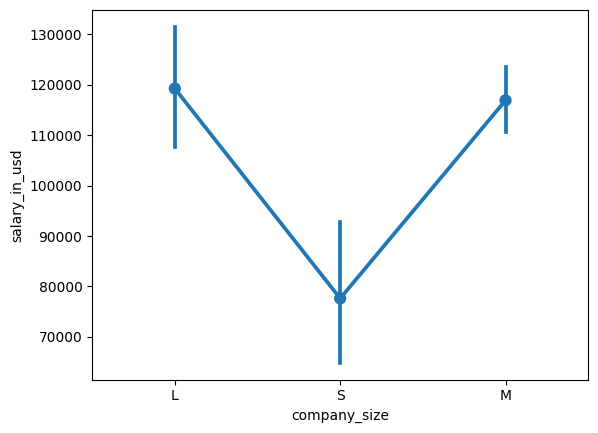

In [145]:
sns.pointplot(data=df, x='company_size', y='salary_in_usd')

In [146]:
mapping_dict={
    "S": 0,
    "M": 1,
    "L": 2
}

In [147]:
df['company_size']=df['company_size'].map(mapping_dict)

In [148]:
df[['company_size', 'salary_in_usd']].corr()

,company_size,salary_in_usd
company_size,1.000000,0.151205
salary_in_usd,0.151205,1.000000


##Square root of 'salary_in_usd' as the target

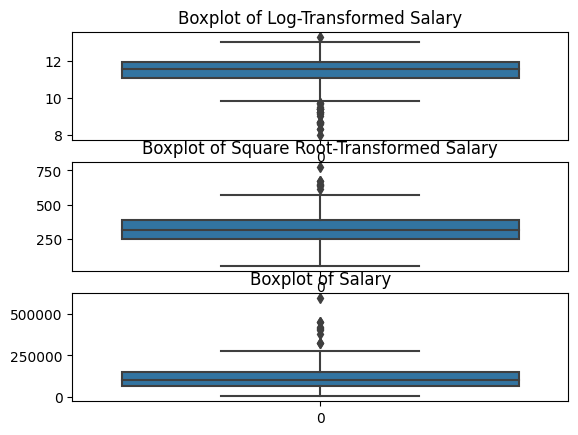

In [149]:
fig, ax = plt.subplots(3)

# Plot the boxplot of log-transformed values
sns.boxplot(np.log(df['salary_in_usd']), ax=ax[0])
ax[0].set_title('Boxplot of Log-Transformed Salary')

# Plot the boxplot of square root-transformed values
sns.boxplot(np.sqrt(df['salary_in_usd']), ax=ax[1])
ax[1].set_title('Boxplot of Square Root-Transformed Salary')

sns.boxplot(df['salary_in_usd'], ax=ax[2])
ax[2].set_title('Boxplot of Salary')
plt.show()

In [150]:
df['sqrt_salary_in_usd']=np.sqrt(df['salary_in_usd'])

In [151]:
df.corr()[['sqrt_salary_in_usd', 'salary_in_usd', 'salary']]

<ipython-input-151-2f1f6c4311b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['sqrt_salary_in_usd', 'salary_in_usd', 'salary']]


,sqrt_salary_in_usd,salary_in_usd,salary
Unnamed: 0,0.217240,0.167025,-0.096250
work_year,0.228893,0.170493,-0.087577
experience_level,0.527641,0.484233,-0.027517
employment_type,0.218955,0.181284,0.019563
salary,-0.102065,-0.083906,1.000000
salary_in_usd,0.966533,1.000000,-0.083906
remote_ratio,0.143081,0.132122,-0.014608
company_size,0.154133,0.151205,0.079959
job_cat_encoded,-0.128780,-0.122429,-0.002040
currency_to_usd,0.295956,0.210022,-0.452249


<ipython-input-152-44e1376cee41>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

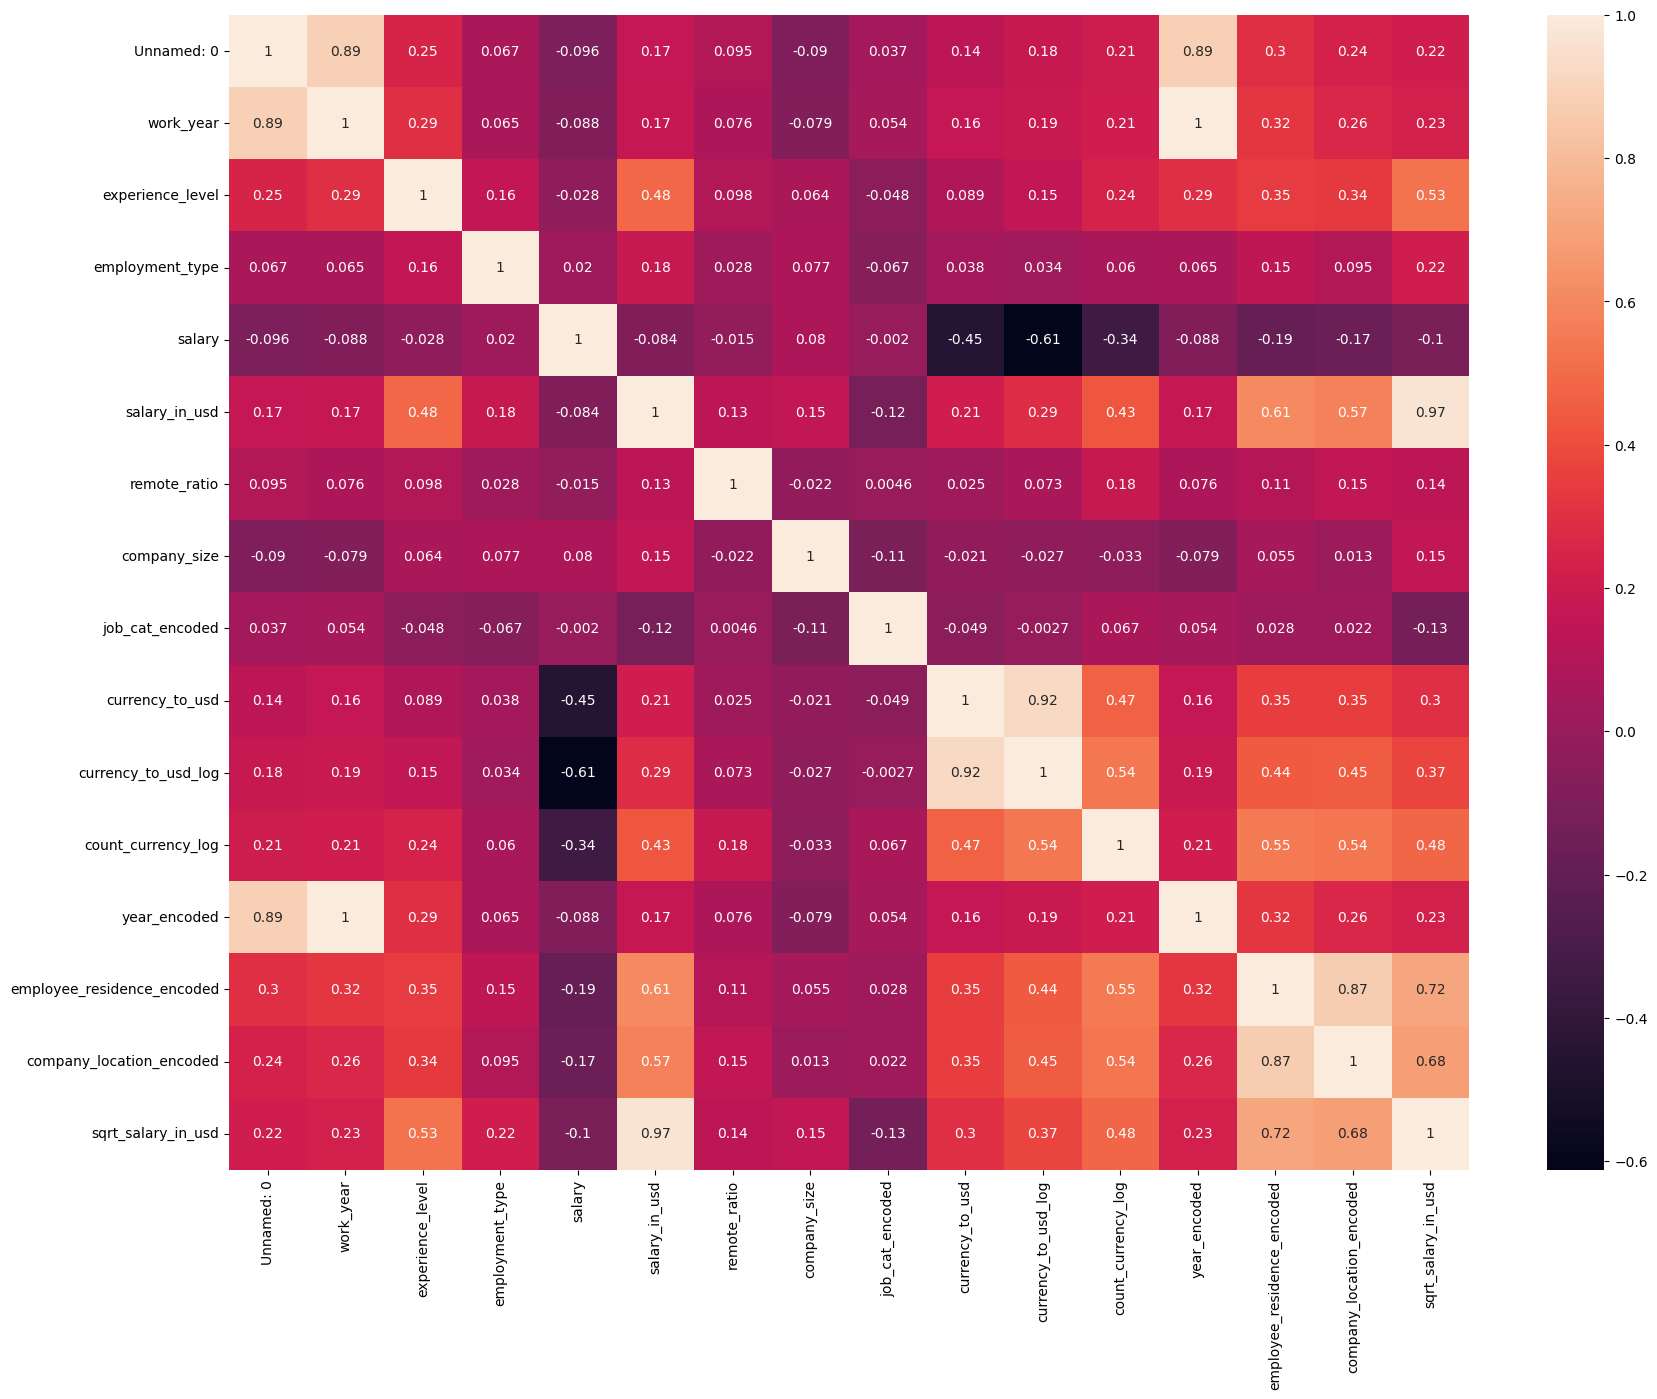

In [152]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

# Modeling

##Removing Outliers

In [179]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [180]:
min=df['salary_in_usd'].quantile(0.25)
max=df['salary_in_usd'].quantile(0.75)
IQR=max-min
upper_threshold=max + 1.5*IQR
lower_threshold=min - 1.5*IQR

In [183]:
df = df[(df['salary_in_usd'] <= upper_threshold) & (df['salary_in_usd'] >= lower_threshold)]

## Base model-Linear Regression

<Axes: xlabel='Unnamed: 0', ylabel='sqrt_salary_in_usd'>

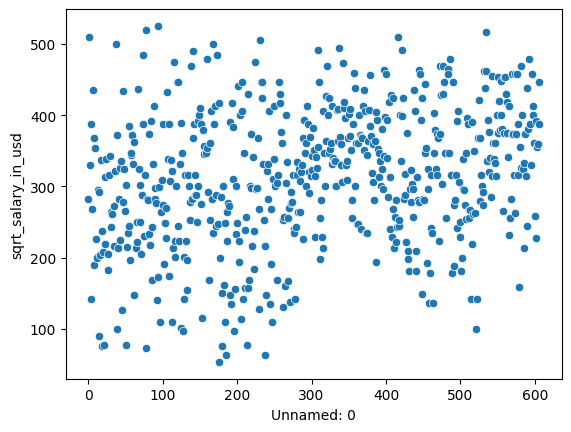

In [184]:
sns.scatterplot(data=df, x='Unnamed: 0', y='sqrt_salary_in_usd')

In [185]:
from sklearn.linear_model import LinearRegression
y=df['salary_in_usd']
X=df.drop(['currency_to_usd','company_location', 'employee_residence', 'salary_currency', 'job_category', 'job_title','currency_to_usd_log','Unnamed: 0','sqrt_salary_in_usd', 'salary_in_usd', 'salary'], axis=1)

In [186]:
# Remove rows with NaN values
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index]

In [187]:
X=X_cleaned
y=y_cleaned

In [188]:
from sklearn.model_selection import train_test_split
SEED=123
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=SEED)

In [158]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   work_year                   607 non-null    int64  
 1   experience_level            607 non-null    int64  
 2   employment_type             607 non-null    int64  
 3   remote_ratio                607 non-null    int64  
 4   company_size                607 non-null    int64  
 5   job_cat_encoded             607 non-null    int64  
 6   count_currency_log          607 non-null    float64
 7   year_encoded                607 non-null    int64  
 8   employee_residence_encoded  607 non-null    int64  
 9   company_location_encoded    607 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 47.5 KB


In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lr=LinearRegression()
kf=KFold(n_splits=6, shuffle=True, random_state=42)
cv=cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=kf)

In [ ]:
lr

In [190]:
print(-cv.mean())

28170.57484848485


In [191]:
print(df['salary_in_usd'].mean())

107168.85594639866


##base Model 2-DecisionTreeRegressor

In [207]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.13, random_state=SEED)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
y_pred_train=dt.predict(X_train)

In [208]:
cv= - cross_val_score(dt, X_train, y_train, scoring='neg_mean_absolute_error', cv=6, n_jobs=-1)
print('score of cv error', cv.mean())

score of cv error 32302.227433221287


In [200]:
from sklearn.metrics import mean_squared_error as MSE
mse_dt_train=MSE(y_pred_train, y_train)
print('score tree model of training set', np.sqrt(mse_dt_train))


score tree model of training set 39069.08409364219


##Comparision Model-Gradient Boosting Regressor

In [192]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, min_samples_split= 10, n_estimators= 50)
cv_gbr=cross_val_score(gbr, X, y, scoring='neg_mean_absolute_error', cv=kf)

In [193]:
print(-cv_gbr.mean())

26929.200420202047


In [194]:
gbr.fit(X_train, y_train)
y_pred=gbr.predict(X_test)

In [195]:
from sklearn.metrics import mean_squared_error as MSE
mse_train=MSE(y_test, y_pred)

In [196]:
rmse_train=mse_train**(1/2)
print('root mean squared error using square root trainsformation on data:', rmse_train)

root mean squared error using square root trainsformation on data: 37645.233944038395


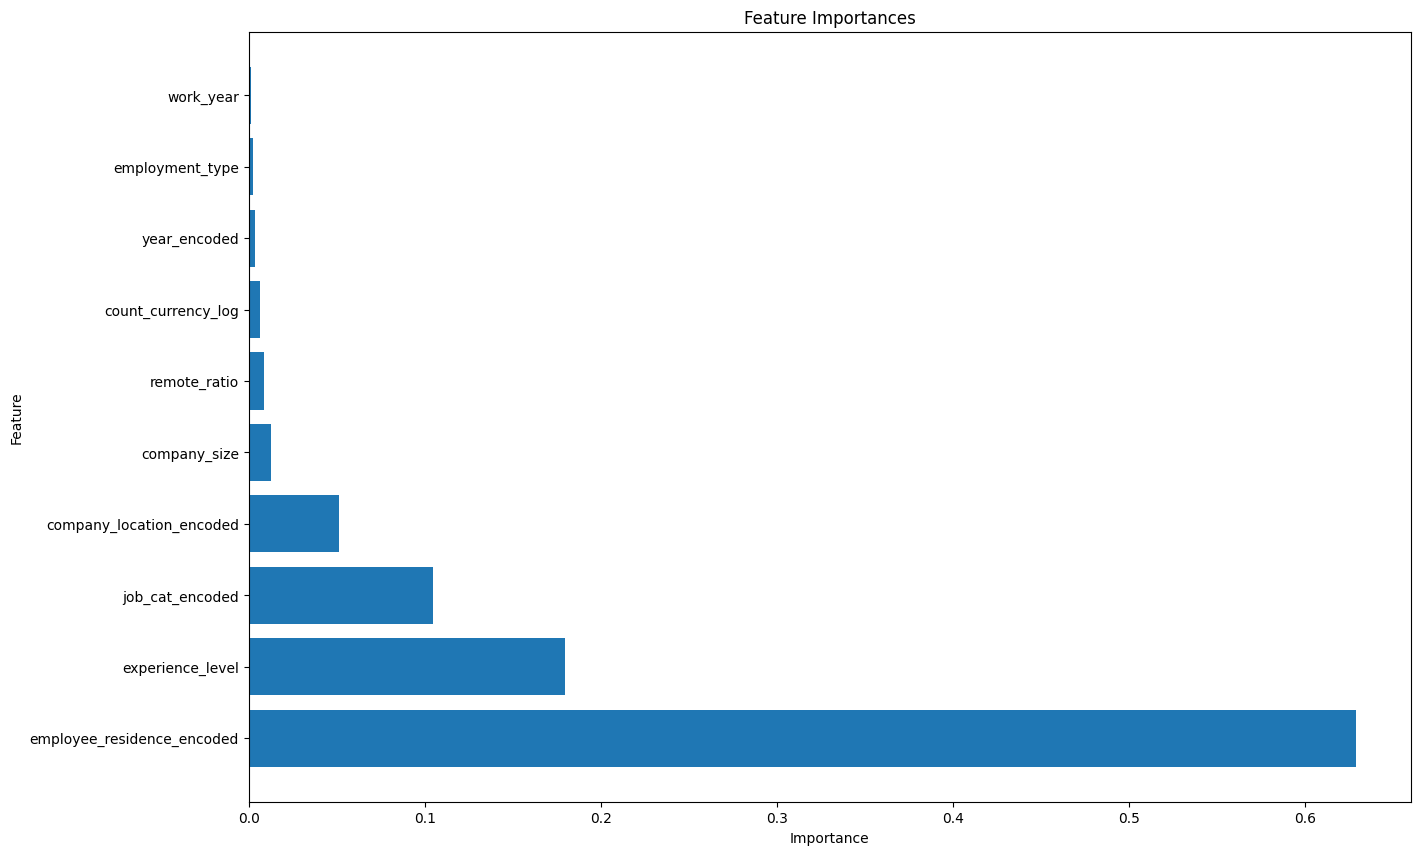

In [197]:
gbr.fit(X_train, y_train)
feature_importances = gbr.feature_importances_

# Get the names of the features (assuming X_train is a DataFrame or array with feature names)
feature_names = X_train.columns  # If X_train is a DataFrame
# Or, if X_train is a numpy array without feature names, you can use a list of feature names

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 10))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), feature_importances[indices])
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices])
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

##Random Forest

In [201]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)


In [202]:
print(np.sqrt(MSE(y_pred_rf, y_test)))

38683.750764511235


In [173]:
pip install xgboost

In [203]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
cv_xgb=cross_val_score(xgb, X, y, scoring='neg_mean_absolute_error', cv=kf)

In [204]:
print(-cv_xgb.mean())

29151.495371897272


In [205]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Prepare your data
# Assuming you have your features in X and target variable in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the GradientBoostingRegressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Step 4: Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5],      # Step size shrinkage used in each boosting stage
    'max_depth': [3, 5, 7],                 # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
}

# Step 5: Perform the GridSearchCV with cross-validation
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 6: Get the best model and its hyperparameters
best_gb_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
y_pred = best_gb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error on Test Set: 1052053949.2111919


In [206]:
np.sqrt(mse)

32435.381132510094

#Conclusion

The comparision model (Gradient boositing regressor) performed slightly better than the baseline model(linear regression):
32554.149075444653 > 32182.615148235436.